In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TFID- Term Frequency 

In [2]:
#task 1- loading
data = pd.read_json('../input/game-of-thrones-srt/season1.json')

In [3]:
data.head()

,Game Of Thrones S01E01 Winter Is Coming.srt,Game Of Thrones S01E02 The Kingsroad.srt,Game Of Thrones S01E03 Lord Snow.srt,"Game Of Thrones S01E04 Cripples, Bastards, And Broken Things.srt",Game Of Thrones S01E05 The Wolf And The Lion.srt,Game Of Thrones S01E06 A Golden Crown.srt,Game Of Thrones S01E07 You Win Or You Die.srt,Game Of Thrones S01E08 The Pointy End.srt,Game Of Thrones S01E09 Baelor.srt,Game Of Thrones S01E10 Fire And Blood.srt
1,"Easy, boy.","You need to drink, child.","Welcome, Lord Stark.",The little lord's been dreaming again.,Does Ser Hugh have any family in the capital?,"Your pardon, Your Grace.","""Summoned to court to answer for the crimes","Yah! Left high, left low.","You've seen better days, my lord.",Look at me. Look at me!
10,Our orders were to track the wildlings.,The Dothraki believe that one day,Sturdy old thing.,- Hodor? - Help Bran down the hall.,But who holds the straws?,He butchered my men.,"Go on, say something clever.",Go back to your room.,I've given up trying to guess.,"It told me to come with him, so I did."
100,- Right. Give it here. - No!,Such a little thing.,That's not true. You killed the beast.,We're done for today. Go clean the armoury.,# In garb of red and gold #,Drop the blade!,Your sister was a corpse and I was a living girl,"- We should burn them. - Snow's not wrong, my ...",- Oh! - You too.,This one here.
101,Put away your blade.,A bird without feathers.,You only spared the girl because of the love y...,That's all you're good for.,This isn't the Kingsroad.,"- No, don't. - Do it.",and he loved her more than me.,Fire will do for them. The wildling way.,You see that?,Look at it and see what happens to traitors.
102,"- I take orders from your father, not you. - P...",They came to take his body away,"I didn't, I...",- Well fought! - Piss off.,- You said we were riding for Winterfell. - I ...,Are you all right?,"When the king returns from his hunt, I'll tell...",I want Maester Aemon to examine them first.,"Fifteen, she is.",- You promised to be merciful. - I was.


In [4]:
data.columns = ['Winter Is Coming', 'The Kingsroad','Lord Snow','Cripples, Bastards, And Broken Things',
                'The Wolf And The Lion','A Golden Crown','You Win Or You Die','The Pointy End','Baelor','Fire And Blood']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 775
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Winter Is Coming                       559 non-null    object
 1   The Kingsroad                          571 non-null    object
 2   Lord Snow                              740 non-null    object
 3   Cripples, Bastards, And Broken Things  754 non-null    object
 4   The Wolf And The Lion                  741 non-null    object
 5   A Golden Crown                         583 non-null    object
 6   You Win Or You Die                     775 non-null    object
 7   The Pointy End                         666 non-null    object
 8   Baelor                                 679 non-null    object
 9   Fire And Blood                         590 non-null    object
dtypes: object(10)
memory usage: 66.6+ KB


In [6]:
data['A Golden Crown'].head()

1      Your pardon, Your Grace.
10         He butchered my men.
100             Drop the blade!
101       - No, don't. - Do it.
102          Are you all right?
Name: A Golden Crown, dtype: object

In [7]:
#task 2- cleaning
data['A Golden Crown']= data['A Golden Crown'].map(lambda x: re.sub(r'[^a-zA-Z]',' ', str(x)))

In [8]:
data = data.dropna(subset = ['A Golden Crown'])

In [9]:
stop= stopwords.words('english')

In [10]:
#task 3- remove encoding
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII','ignore').decode('ASCII')
    return word

In [11]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [12]:
#task 4- define lemmatizing
data['A Golden Crown']=data['A Golden Crown'].apply(remove_encoding_text)

In [13]:
text= ' '.join(words for words in data['A Golden Crown'])
len(text)

12934

In [14]:
lemma = WordNetLemmatizer().lemmatize

In [15]:
#task 5- fit and transform text, with or without lemmatizing
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w)>3 and w.isalpha()]
    return tokens

In [16]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)),
                            stop_words = stop, strip_accents = 'unicode')

In [17]:
tdm = vectorizer.fit_transform(data['A Golden Crown'])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [18]:
#task 6- get word frequencies and create wordcloud
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [19]:
import numpy as np
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,0%%, %d%%)" % np.random.randint(49,51))

In [20]:
w= WordCloud(width=1500, height=1200, mode='RGBA', background_color='white',color_func = grey_color_func,
            max_words=200).fit_words(dict(tfidf_weights))

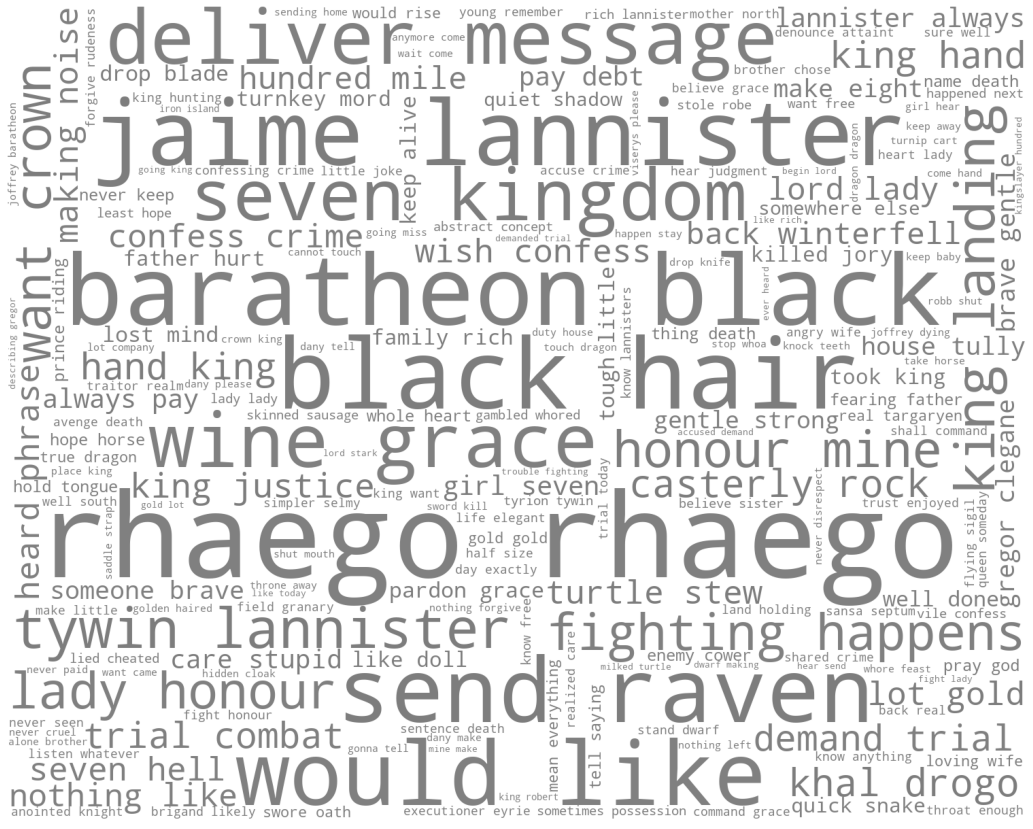

In [21]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('wordcloud.png')